In [106]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.parser import parse

%matplotlib inline

In [2]:
now = datetime.now()
now

datetime.datetime(2017, 7, 9, 20, 57, 8, 821469)

In [4]:
print (now.hour, now.minute, now.second, now.microsecond)

20 57 8 821469


In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [8]:
delta

datetime.timedelta(926, 56700)

## Converting between string and datetime  

In [9]:
stamp = datetime(2011,1,3,15,2,3)
str(stamp)

'2011-01-03 15:02:03'

In [10]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [11]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [13]:
datestrs = ['7/6/2011', '8/6/2011']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

## Time Series Basics in pandas 

In [14]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [15]:
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02   -1.132819
2011-01-05   -1.243277
2011-01-07   -0.189207
2011-01-08    1.279209
2011-01-10    0.691129
2011-01-12    1.155523
dtype: float64

In [16]:
ts + ts[::2]

2011-01-02   -2.265638
2011-01-05         NaN
2011-01-07   -0.378414
2011-01-08         NaN
2011-01-10    1.382258
2011-01-12         NaN
dtype: float64

In [17]:
ts[::2]

2011-01-02   -1.132819
2011-01-07   -0.189207
2011-01-10    0.691129
dtype: float64

In [18]:
ts

2011-01-02   -1.132819
2011-01-05   -1.243277
2011-01-07   -0.189207
2011-01-08    1.279209
2011-01-10    0.691129
2011-01-12    1.155523
dtype: float64

In [19]:
stamp = ts.index[1]
ts[stamp]

-1.2432767534311771

In [20]:
ts['20110105']

-1.2432767534311771

In [21]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods = 1000)
                  )

In [22]:
longer_ts

2000-01-01   -0.650177
2000-01-02   -1.076574
2000-01-03    1.002643
2000-01-04   -0.010652
2000-01-05    0.535157
2000-01-06    0.967614
2000-01-07    1.491715
2000-01-08    0.808377
2000-01-09   -1.561902
2000-01-10    0.346456
2000-01-11    0.368762
2000-01-12   -1.841343
2000-01-13    1.151609
2000-01-14    0.269597
2000-01-15   -0.740086
2000-01-16   -0.222878
2000-01-17    1.499440
2000-01-18   -0.774400
2000-01-19    0.225168
2000-01-20    0.490661
2000-01-21   -0.801840
2000-01-22    1.373483
2000-01-23    0.136232
2000-01-24   -0.515019
2000-01-25    0.723691
2000-01-26    0.066415
2000-01-27    0.708489
2000-01-28    0.642685
2000-01-29   -0.298159
2000-01-30   -0.743900
                ...   
2002-08-28   -0.739367
2002-08-29    0.368156
2002-08-30   -0.716076
2002-08-31   -1.762393
2002-09-01    0.175009
2002-09-02   -0.316089
2002-09-03   -1.603338
2002-09-04    0.427494
2002-09-05    0.147435
2002-09-06    0.107312
2002-09-07   -0.332985
2002-09-08    0.454506
2002-09-09 

In [23]:
longer_ts['2001-05']

2001-05-01   -0.080191
2001-05-02   -0.158020
2001-05-03    1.890876
2001-05-04    1.288446
2001-05-05    1.026802
2001-05-06    0.500895
2001-05-07    0.428627
2001-05-08   -0.629849
2001-05-09   -1.517989
2001-05-10    0.474538
2001-05-11    0.450279
2001-05-12   -0.728027
2001-05-13    0.003655
2001-05-14    0.214128
2001-05-15   -0.152120
2001-05-16    0.344973
2001-05-17    0.268425
2001-05-18   -1.075710
2001-05-19    0.557338
2001-05-20    1.414715
2001-05-21   -0.607109
2001-05-22    0.507563
2001-05-23    0.795907
2001-05-24   -1.399896
2001-05-25    1.890872
2001-05-26   -0.611905
2001-05-27    1.324131
2001-05-28   -0.454096
2001-05-29    0.354980
2001-05-30   -0.926475
2001-05-31   -2.217834
Freq: D, dtype: float64

In [24]:
#Slicing
ts[datetime(2011,1,7):]

2011-01-07   -0.189207
2011-01-08    1.279209
2011-01-10    0.691129
2011-01-12    1.155523
dtype: float64

In [25]:
# Range inqury
ts['1/3/2011':'1/11/2011']

2011-01-05   -1.243277
2011-01-07   -0.189207
2011-01-08    1.279209
2011-01-10    0.691129
dtype: float64

In [26]:
# alternative: truncate method 
ts.truncate(before = '1/3/2011', after = '1/9/2011')

2011-01-05   -1.243277
2011-01-07   -0.189207
2011-01-08    1.279209
dtype: float64

# Date Ranges, Frequencies, and Shifting 

In [27]:
ts

2011-01-02   -1.132819
2011-01-05   -1.243277
2011-01-07   -0.189207
2011-01-08    1.279209
2011-01-10    0.691129
2011-01-12    1.155523
dtype: float64

In [28]:
ts.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

## Generating Date Ranges 

In [29]:
#By default, date_range generates daily stamps
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [30]:
# generate a date index containing the last business day of each month
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

## Frequencies and Date Offsets 

In [31]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [32]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq = '1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00',
               '2000-01-01 15:00:00', '2000-01-01 16:30:00',
               '2000-01-01 18:00:00', '2000-01-01 19:30:00',
               '2000-01-01 21:00:00', '2000-01-01 22:30:00',
               '2000-01-02 00:00:00', '2000-01-02 01:30:00',
               '2000-01-02 03:00:00', '2000-01-02 04:30:00',
               '2000-01-02 06:00:00', '2000-01-02 07:30:00',
               '2000-01-02 09:00:00', '2000-01-02 10:30:00',
               '2000-01-02 12:00:00', '2000-01-02 13:30:00',
               '2000-01-02 15:00:00', '2000-01-02 16:30:00',
               '2000-01-02 18:00:00', '2000-01-02 19:30:00',
               '2000-01-02 21:00:00', '2000-01-02 22:30:00',
               '2000-01-

In [33]:
#Table 10-4 contains a list of fequency codes and date offset classes 

## Shifting (Leading and Lagging) Data 

In [34]:
ts

2011-01-02   -1.132819
2011-01-05   -1.243277
2011-01-07   -0.189207
2011-01-08    1.279209
2011-01-10    0.691129
2011-01-12    1.155523
dtype: float64

In [35]:
ts.shift(2)

2011-01-02         NaN
2011-01-05         NaN
2011-01-07   -1.132819
2011-01-08   -1.243277
2011-01-10   -0.189207
2011-01-12    1.279209
dtype: float64

In [36]:
ts.shift(-2)

2011-01-02   -0.189207
2011-01-05    1.279209
2011-01-07    0.691129
2011-01-08    1.155523
2011-01-10         NaN
2011-01-12         NaN
dtype: float64

In [37]:
ts/ts.shift(1)-1

2011-01-02         NaN
2011-01-05    0.097507
2011-01-07   -0.847816
2011-01-08   -7.760890
2011-01-10   -0.459722
2011-01-12    0.671935
dtype: float64

In [38]:
ts.shift(2,freq='M')

2011-02-28   -1.132819
2011-02-28   -1.243277
2011-02-28   -0.189207
2011-02-28    1.279209
2011-02-28    0.691129
2011-02-28    1.155523
dtype: float64

In [39]:
ts

2011-01-02   -1.132819
2011-01-05   -1.243277
2011-01-07   -0.189207
2011-01-08    1.279209
2011-01-10    0.691129
2011-01-12    1.155523
dtype: float64

# Periods and Period Arithmetic

In [40]:
p = pd.Period(2007,freq='A-DEC') #full timespan from Jan 1 2007 to 
# Dec 31 2007 inclusive.

In [41]:
p

Period('2007', 'A-DEC')

In [42]:
p+5

Period('2012', 'A-DEC')

In [43]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq = 'M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [44]:
Series(np.random.randn(6),index=rng)

2000-01   -2.239643
2000-02    0.490243
2000-03    0.430305
2000-04   -1.261812
2000-05    0.743805
2000-06   -0.841700
Freq: M, dtype: float64

In [45]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## Period Frequency Conversion 

In [46]:
#Convert annual period to monthly period 
p = pd.Period('2007',freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [47]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

## Converting Timestamps to Periods (pg 327/470)

In [49]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [51]:
ts=Series(np.random.randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    0.412677
2000-02-29   -0.957724
2000-03-31    1.343311
Freq: M, dtype: float64

In [52]:
pts

2000-01    0.412677
2000-02   -0.957724
2000-03    1.343311
Freq: M, dtype: float64

In [54]:
ts2 = pts.to_timestamp(how='end')
ts2

2000-01-31    0.412677
2000-02-29   -0.957724
2000-03-31    1.343311
Freq: M, dtype: float64

## Create a PeriodIndex from Arrays 

In [55]:
%ls

2014021509555352.jpg
Ch10_TimeSeries.ipynb
GitHub/
GoPro Projects/
Microsoft User Data/
Reactor1_1st_col_only.pdf
Universal Studios Hollywood - Ticket Store.pdf
pydata-book-master/


In [56]:
data = pd.read_csv('pydata-book-master/ch08/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [57]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [58]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


In [59]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq = 'Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [60]:
data.index=index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# Resampling and Frequency Conversion 

#### Aggregating higher frequency data to lower frequency is called downsampling
#### Converting lower frequency to higher frequency is called upsampling

In [61]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -1.062436
2000-01-02   -0.239650
2000-01-03    0.741867
2000-01-04   -0.875616
2000-01-05    2.363079
2000-01-06    0.363849
2000-01-07    0.494920
2000-01-08    2.157773
2000-01-09    0.596015
2000-01-10    0.358148
2000-01-11    0.721036
2000-01-12    0.074277
2000-01-13   -2.406881
2000-01-14   -0.918424
2000-01-15   -1.913425
2000-01-16   -0.388620
2000-01-17   -0.773695
2000-01-18    1.213644
2000-01-19   -1.416199
2000-01-20    0.443951
2000-01-21    1.013809
2000-01-22    0.964196
2000-01-23   -0.707920
2000-01-24    0.054304
2000-01-25   -0.532108
2000-01-26   -0.480438
2000-01-27   -1.396796
2000-01-28    0.900062
2000-01-29    1.549384
2000-01-30    0.167455
                ...   
2000-03-11   -0.201942
2000-03-12   -2.192075
2000-03-13    0.251954
2000-03-14    1.699977
2000-03-15   -0.443016
2000-03-16   -0.604117
2000-03-17    0.097517
2000-03-18    1.711856
2000-03-19    0.744295
2000-03-20    0.288576
2000-03-21   -0.932013
2000-03-22   -0.159045
2000-03-23 

In [66]:
# Downsampling
ts.resample('M').mean()

2000-01-31    0.034946
2000-02-29    0.096494
2000-03-31   -0.049055
2000-04-30    0.041818
Freq: M, dtype: float64

In [67]:
ts.resample('M', kind='period').mean()

2000-01    0.034946
2000-02    0.096494
2000-03   -0.049055
2000-04    0.041818
Freq: M, dtype: float64

## Downsampling 

In [70]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [72]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [74]:
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [77]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [81]:
ts.resample('5min', loffset='-1s', label='left').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

In [82]:
ts.resample('5min', closed='left').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Resampling with GroupBy 

In [85]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [87]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

## Upsampling and Interpolation  

In [88]:
frame = DataFrame(np.random.randn(2,4),
                  index = pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns = ['Colorado', 'Texas', 'New York', 'Ohio']
                 )
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.179281,0.736304,-1.847104,1.144031
2000-01-12,0.243552,-0.160666,1.457650,0.252504


In [92]:
# Resample to daily frequency 
df_daily = frame.resample('D').mean()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.179281,0.736304,-1.847104,1.144031
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.243552,-0.160666,1.457650,0.252504


In [98]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.179281,0.736304,-1.847104,1.144031
2000-01-06,-0.179281,0.736304,-1.847104,1.144031
2000-01-07,-0.179281,0.736304,-1.847104,1.144031
2000-01-08,-0.179281,0.736304,-1.847104,1.144031
2000-01-09,-0.179281,0.736304,-1.847104,1.144031
2000-01-10,-0.179281,0.736304,-1.847104,1.144031
2000-01-11,-0.179281,0.736304,-1.847104,1.144031
2000-01-12,0.243552,-0.160666,1.457650,0.252504


In [99]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.179281,0.736304,-1.847104,1.144031
2000-01-06,-0.179281,0.736304,-1.847104,1.144031
2000-01-07,-0.179281,0.736304,-1.847104,1.144031
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.243552,-0.160666,1.457650,0.252504


In [100]:
frame.resample('W-THU').mean()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.179281,0.736304,-1.847104,1.144031
2000-01-13,0.243552,-0.160666,1.457650,0.252504


## Time Series Plotting

In [101]:
%ls

2014021509555352.jpg
Ch10_TimeSeries.ipynb
GitHub/
GoPro Projects/
Microsoft User Data/
Reactor1_1st_col_only.pdf
Universal Studios Hollywood - Ticket Store.pdf
pydata-book-master/


In [103]:
close_px_all = pd.read_csv('pydata-book-master/ch09/stock_px.csv',
                           parse_dates=True, index_col=0
                          )
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [104]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


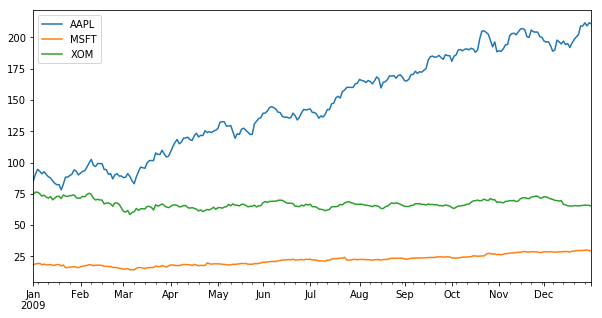

In [113]:
close_px['2009'].plot(figsize=(10,5))

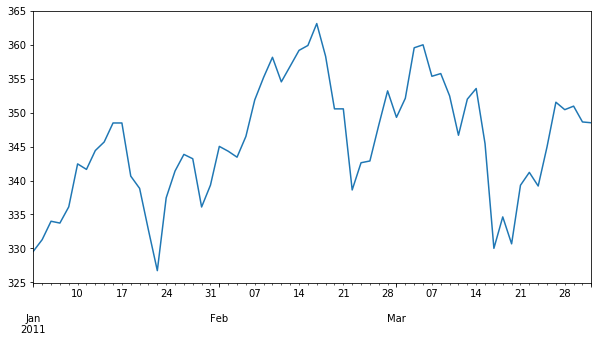

In [112]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot(figsize=(10,5))

/Users/gcfang/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


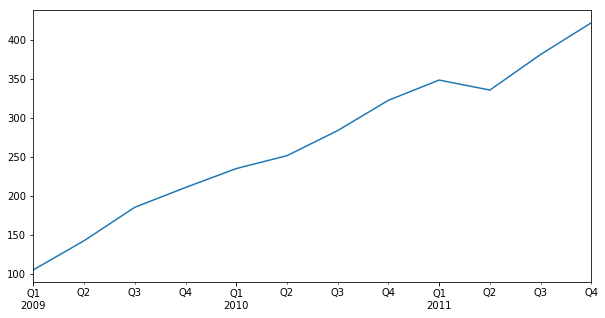

In [117]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.ix['2009':].plot(figsize=(10,5))

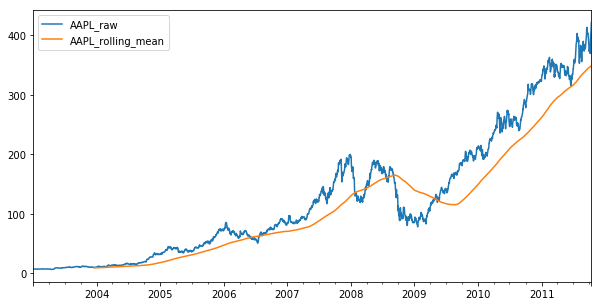

In [126]:
close_px.AAPL.plot(label='AAPL_raw',legend=True, figsize=(10,5))
Series.rolling(close_px.AAPL, 250).mean().plot(label='AAPL_rolling_mean', legend=True)

In [130]:
appl_std250 = Series.rolling(close_px.AAPL, window=250, min_periods=10).std()
appl_std250

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
2003-01-09          NaN
2003-01-10          NaN
2003-01-13          NaN
2003-01-14          NaN
2003-01-15     0.077496
2003-01-16     0.074760
2003-01-17     0.112368
2003-01-20     0.132011
2003-01-21     0.149286
2003-01-22     0.169008
2003-01-23     0.168760
2003-01-24     0.184135
2003-01-27     0.182546
2003-01-28     0.178117
2003-01-29     0.181870
2003-01-30     0.178049
2003-01-31     0.174123
2003-02-03     0.171381
2003-02-04     0.168142
2003-02-05     0.164639
2003-02-06     0.161346
2003-02-07     0.161412
2003-02-10     0.158676
2003-02-11     0.156074
2003-02-12     0.153436
                ...    
2011-09-05    25.320023
2011-09-06    25.218932
2011-09-07    25.174057
2011-09-08    25.134226
2011-09-09    25.071408
2011-09-12    25.010059
2011-09-13    24.939448
2011-09-14    24.901731
2011-09-15    24.854159
2011-09-16    24.854202
2011-09-19    24

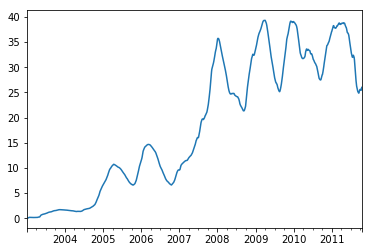

In [131]:
appl_std250.plot()

In [133]:
# Define expanidng mean in terms of rolling_mean
expanding_mean = lambda x: rolling(x, len(x), min_periods=1).mean()

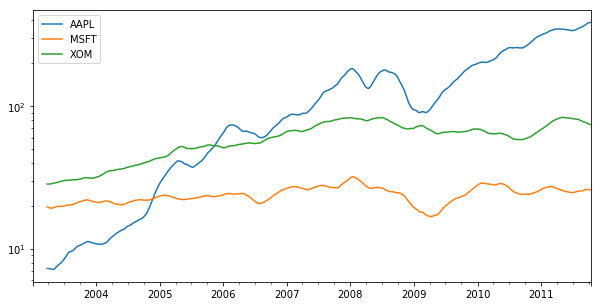

In [137]:
Series.rolling(close_px, 60).mean().plot(logy=True, figsize=(10,5))

## Exponentially-weighted functions 

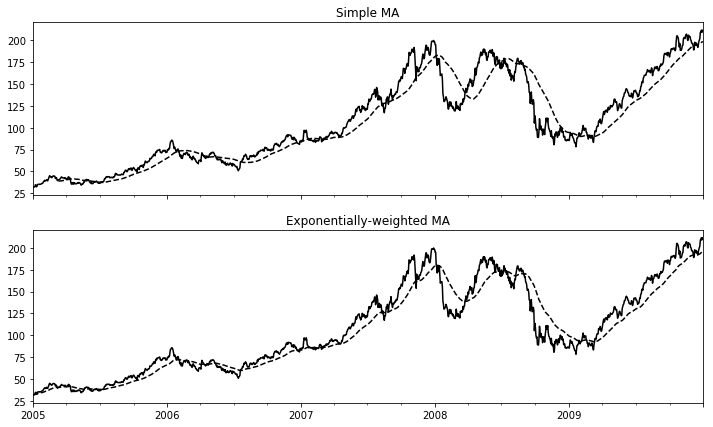

In [141]:
fig,axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                        figsize=(12,7)
                       )
aapl_px = close_px.AAPL['2005':'2009']
ma60 = Series.rolling(aapl_px, 60, min_periods=50).mean()
ewma60 = Series.ewm(aapl_px, span=60).mean()


aapl_px.plot(style='k-', ax=axes[0]) 
ma60.plot(style='k--', ax=axes[0]) 
aapl_px.plot(style='k-', ax=axes[1]) 
ewma60.plot(style='k--', ax=axes[1]) 
axes[0].set_title('Simple MA') 
axes[1].set_title('Exponentially-weighted MA')

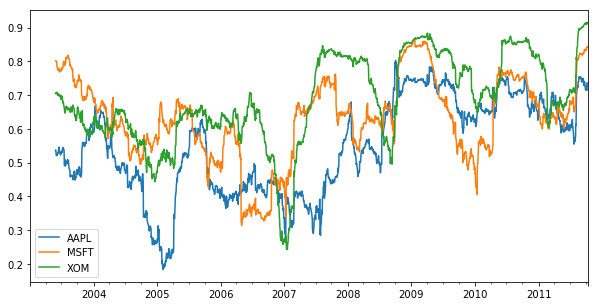

In [155]:
spx_px = close_px_all['SPX']
spx_rets = spx_px/spx_px.shift(1)-1
returns = close_px.pct_change()

corr = Series.rolling(returns,125,min_periods=100).corr(other=spx_rets)
corr.plot(figsize=(10,5))